In [116]:
#import libraries and setup sql cursor
import sqlite3
import pandas as pd
from bs4 import BeautifulSoup
import requests 
import matplotlib.pyplot as plt
import seaborn as sb

conn = sqlite3.connect('data/movies.db')
cur = conn.cursor()

## upload database

In [73]:
imdb_title_basics = pd.DataFrame(cur.execute("SELECT * FROM imdb_title_basics").fetchall())
imdb_title_basics.columns = [i[0] for i in cur.description]

In [74]:
imdb_title_principals = pd.DataFrame(cur.execute("SELECT * FROM imdb_title_principals").fetchall())
imdb_title_principals.columns = [i[0] for i in cur.description]

In [75]:
imdb_title_crew = pd.DataFrame(cur.execute("SELECT * FROM imdb_title_crew").fetchall())
imdb_title_crew.columns = [i[0] for i in cur.description]

In [95]:
imdb_title_ratings = pd.DataFrame(cur.execute("SELECT * FROM imdb_title_ratings").fetchall())
imdb_title_ratings.columns = [i[0] for i in cur.description]

In [96]:
#sc
imdb_title_basics.head(2)

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [97]:
#sc
imdb_title_principals.head(2)

,idx,tconst,ordering,nconst,category,job,characters
0,0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,1,tt0111414,2,nm0398271,director,None,None


In [98]:
#sc
imdb_title_crew.head(2)

,idx,tconst,directors,writers
0,0,tt0285252,nm0899854,nm0899854
1,1,tt0438973,None,"nm0175726,nm1802864"


In [101]:
#sc
imdb_title_ratings.head(5)

,idx,tconst,averagerating,numvotes
0,0,tt10356526,8.3,31
1,1,tt10384606,8.9,559
2,2,tt1042974,6.4,20
3,3,tt1043726,4.2,50352
4,4,tt1060240,6.5,21


In [103]:
#join all uploaded imdb databases
imdb = pd.merge(imdb_title_basics, imdb_title_ratings, left_on="tconst", right_on="tconst")

In [104]:
imdb

,idx_x,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx_y,averagerating,numvotes
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",36049,7.0,77
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",725,7.2,43
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,18429,6.9,4517
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",2223,6.1,13
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",1143,6.5,119
...,...,...,...,...,...,...,...,...,...,...
73851,146115,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,40537,6.2,6
73852,146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",62125,8.7,136
73853,146125,tt9914642,Albatross,Albatross,2017,NaN,Documentary,71368,8.5,8
73854,146129,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,52438,6.6,5


### drop rows with NA in genres column

In [110]:
imdb.dropna(subset=["genres"],inplace=True)

## Get unique genres of database

In [111]:
#reformat genres data go make it a list of items
def get_unique_genres(raw_genres):
    all_genres = []
    genres = raw_genres.str.replace("&", ",")
    genres = raw_genres.str.split(',')
    for item in genres:
        if item != None:
            for genre in item:
                all_genres.append(genre)
    unique_genres = set(all_genres)
    unique_genres = set([(genre.strip()) for genre in unique_genres])
    return unique_genres

In [112]:
unique_genres = get_unique_genres(imdb["genres"])

## set variable = to get_genre_db to get df with just that genre

In [113]:
#function makes new databse with just a certain column
def get_genre_df(df, genre):
    return df[df["genres"].str.contains(genre)]

In [114]:
action = get_genre_df(imdb, "Action")

## sort genre data to whatever way you need then make a plot

In [115]:
#sc
action.head(2)

,idx_x,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx_y,averagerating,numvotes
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",36049,7.0,77
16,20,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",57939,1.9,8248


In [120]:
action.sort_values("averagerating", ascending=False, inplace=True)

<ipython-input-120-c56194a32d21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  action.sort_values("averagerating", ascending=False, inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'average rating compared to runtime minutes of movie')

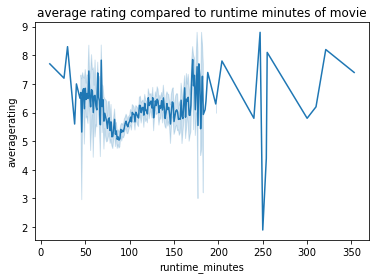

In [123]:
sb.lineplot(action["runtime_minutes"], action["averagerating"]).set_title("average rating compared to runtime minutes of movie")